## Using saved models

In this notebook, we will show the steps to use an already saved model. First, download the saved model and then run the following codes. All the saved models can be found at [this link](https://github.com/biswajitsahoo1111/cbm_codes_open/tree/master/notebooks/saved_models).

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model("./saved_models/CWRU_CNN_raw_time_domain_data.h5")
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 24, 24, 32)        2624      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 32)          82976     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 96)               

Now get the test data on which you want to get inference results. Usually, this is a hold out set for which we don't know the actual outcome. In that case, we can use `model.predict` to obtain class probabilities and then use `np.argmax` to get the predicted class. But for our case, we will only check that this saved model produces the same result that we obtained while training the model from scratch. For that reason we will again load the data, split it into training and test set and only use the test set to make predictions. We will then use the known labels of test set to plot the confusion matrix.

In [3]:
file = np.load('./data/CWRU_48k_load_1_CNN_data.npz')
print(file.files)

['data', 'labels']


In [4]:
data = file['data']
labels = file['labels']
print(data.shape, labels.shape)

(4600, 32, 32) (4600,)


In [5]:
category_labels = np.unique(labels)
print(category_labels)

['Ball_007' 'Ball_014' 'Ball_021' 'IR_007' 'IR_014' 'IR_021' 'Normal'
 'OR_007' 'OR_014' 'OR_021']


In [6]:
labels = pd.Categorical(labels, categories = category_labels).codes

## Train test split
We will show both the training and test accuracy of the saved model.

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 1000, random_state = 829, 
                                                                    stratify = labels)

In [8]:
# reshape data
train_data = train_data.reshape(len(train_data),32,32,1)
test_data = test_data.reshape(len(test_data),32,32,1)
print("Training data and labels shape:")
print(train_data.shape, train_labels.shape)
print()
print("Test data and labels shape:")
print(test_data.shape, test_labels.shape)

Training data and labels shape:
(3600, 32, 32, 1) (3600,)

Test data and labels shape:
(1000, 32, 32, 1) (1000,)


## Prediction on test data

In [9]:
test_predictions = model.predict(test_data)
test_prediction_labels = np.argmax(test_predictions, axis = 1)

## Prediction on training data

In [10]:
train_predictions = model.predict(train_data)
train_prediction_labels = np.argmax(train_predictions, axis = 1)

## Test accuracy of the model

In [11]:
test_accuracy = accuracy_score(test_labels, test_prediction_labels)
print("Test accuracy of best model:", test_accuracy)

Test accuracy of best model: 0.989


Note that this is the accuracy of the best model during training process as we had saved only the best model. 

## Training accuracy of the model

In [12]:
train_accuracy = accuracy_score(train_labels, train_prediction_labels)
print("Training accuracy of best model: ", train_accuracy)

Training accuracy of best model:  1.0


## Confusion matrix on test data

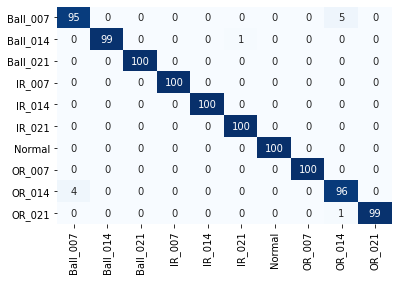

In [13]:
matrix = confusion_matrix(test_labels, test_prediction_labels)
matrix = pd.DataFrame(matrix)
plt.figure()
sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = category_labels,
           yticklabels = category_labels, cmap = "Blues", cbar = False)
plt.xticks(rotation = 90)
plt.show()

The above procedure can be used for all saved models to reproduce the exact result that we have obtained while training the model. For that, readers have to change the saved model name as well as the data on which the model was trained. All other code segments remain the same.